In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.preprocessing import StandardScaler

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic <br>
 prices and the demand for clean air', J. Environ. Economics & Management,<br>
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics<br>
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on<br>
 pages 244-261 of the latter. <br>
 
```markdown
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

In [4]:
df = pd.read_csv("./HousingData.csv", sep=" ")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Data Preprocessing 
- Check for missing or null values
- Try to fill them or just drop them if too much

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
null_dict = {
    'CRIM':df['CRIM'].median(), 
    "ZN":df['ZN'].median(), 
    "INDUS":df['INDUS'].median(), 
    'CHAS':df['CHAS'].mode()[0],          # Here we are using mode because this is a categorical value
    "AGE":df['AGE'].median(), 
    "LSTAT":df['LSTAT'].median()
    }
df.fillna(null_dict,inplace=True)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Check for outliers using box-plot

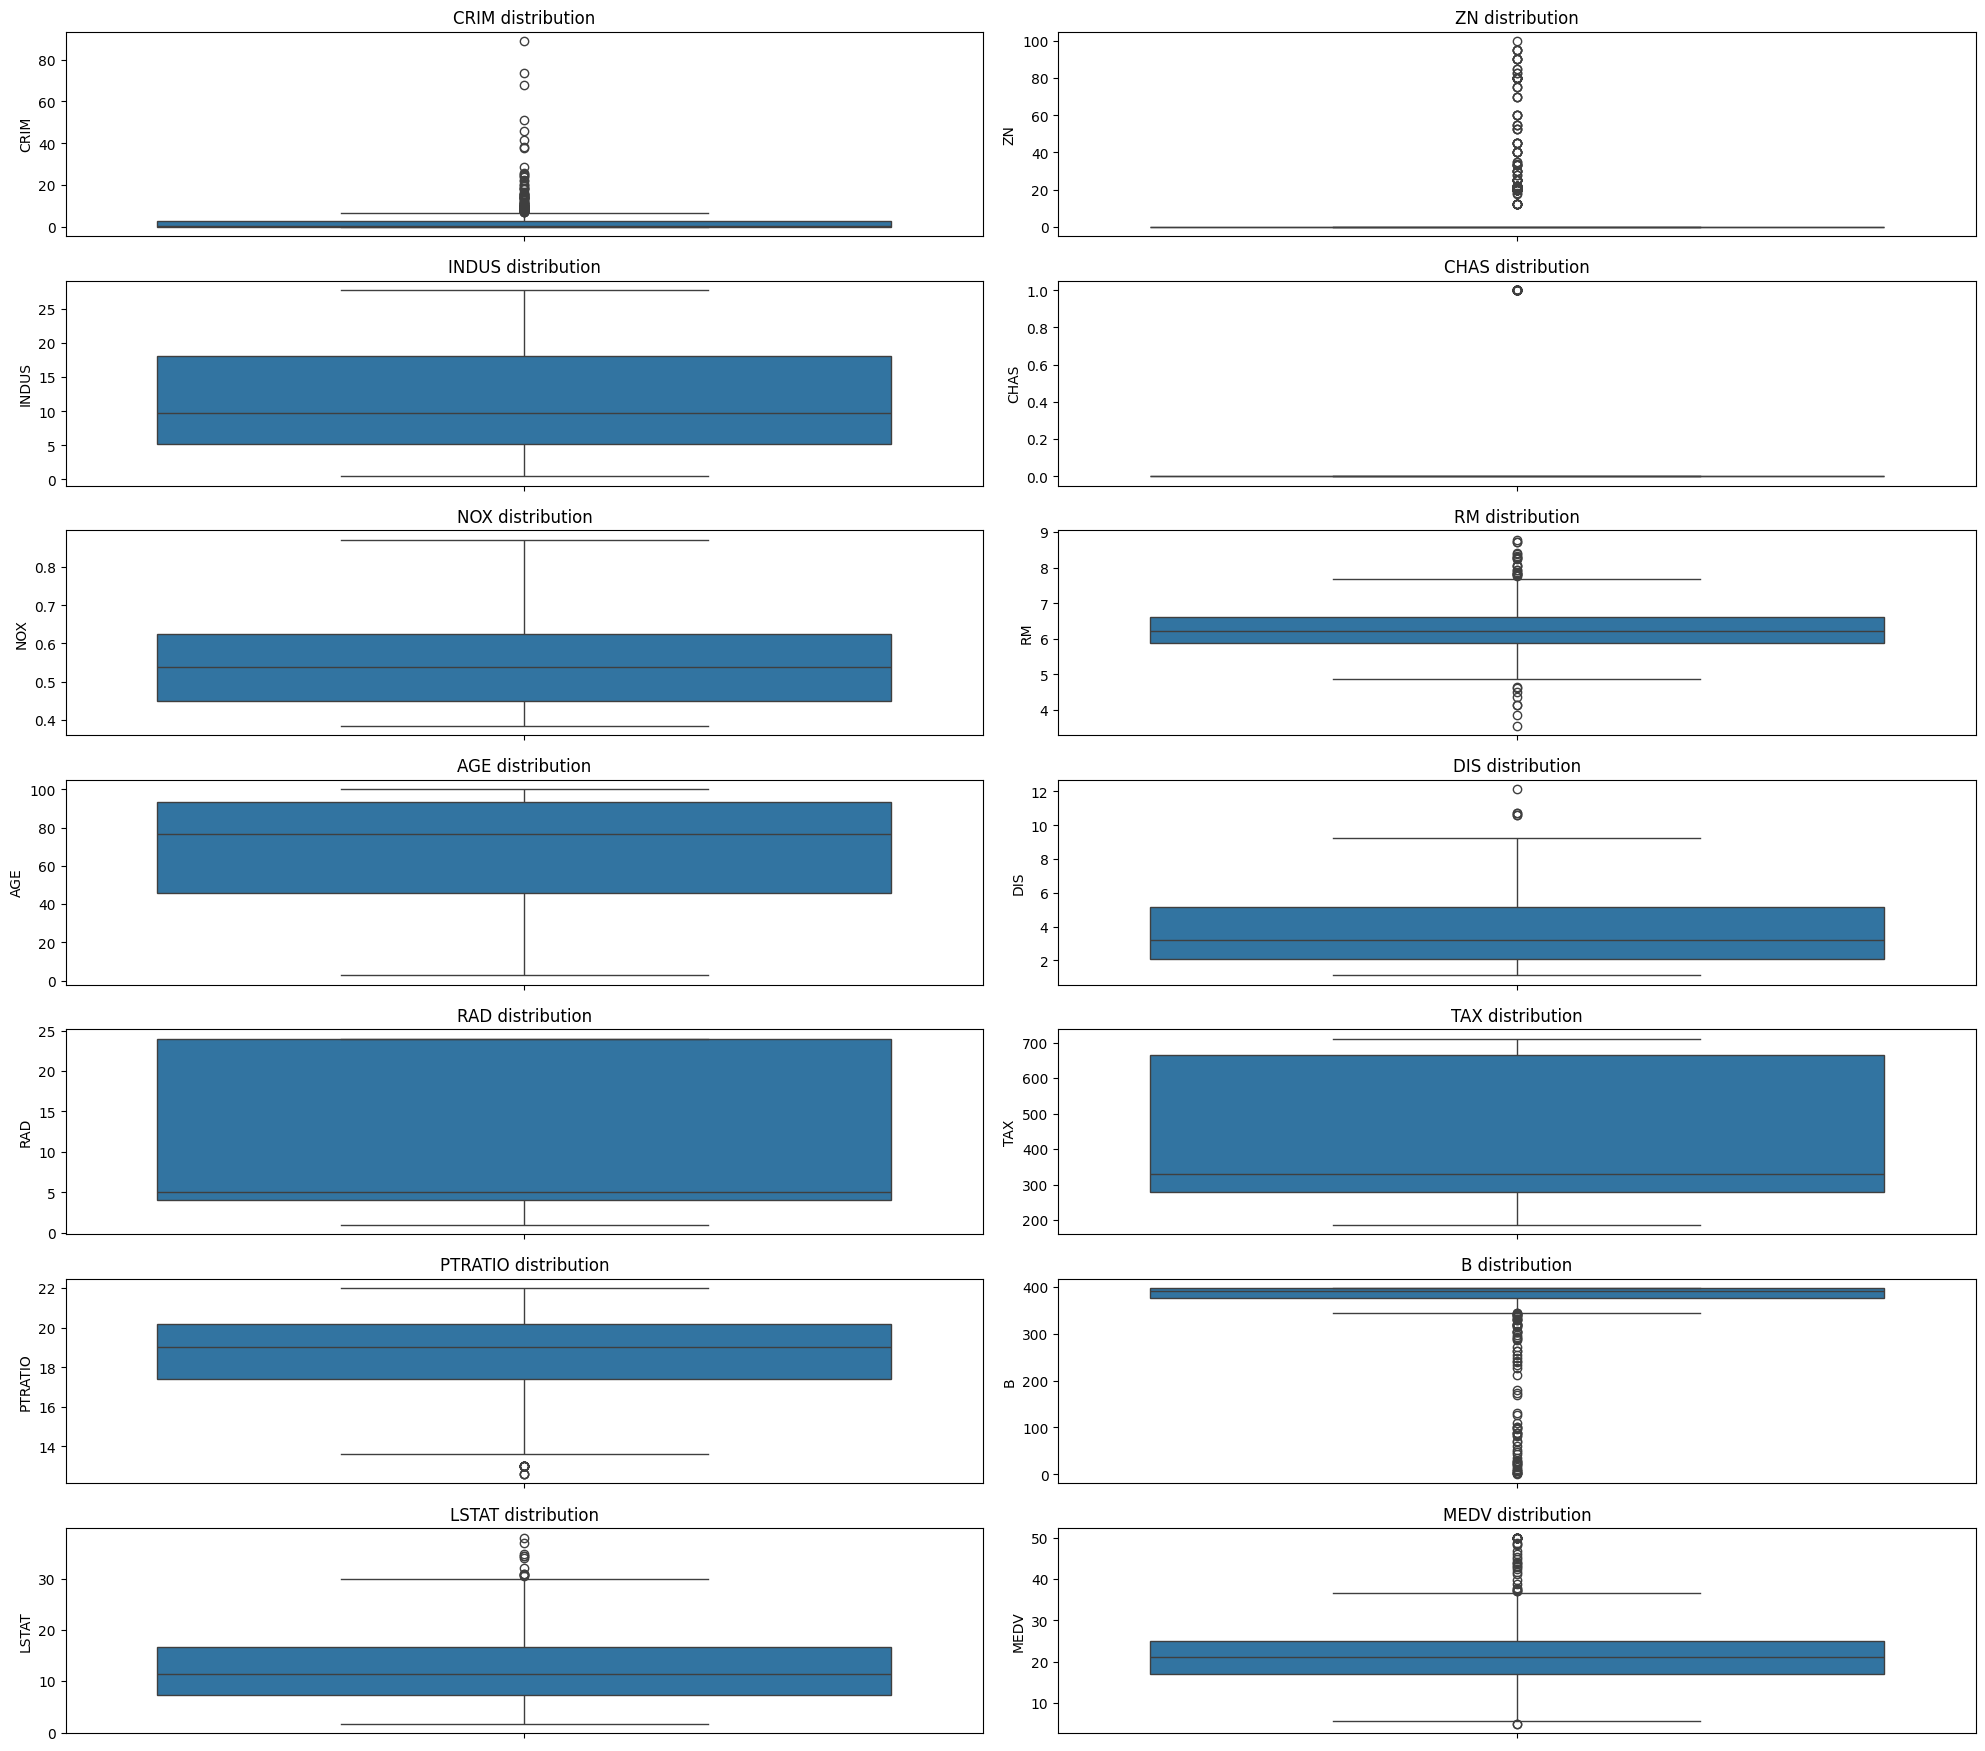

In [8]:
x = 1
plt.figure(figsize=(20,35))
for i in df.columns:
    plt.subplot(14,2,x)
    sns.boxplot(df[i])
    plt.title(f"{i} distribution")
    x += 1
plt.tight_layout()
plt.show()

### Checking percentage of Outliers

In [9]:
for i,j in df.items():
    q1=j.quantile(0.25)
    q3=j.quantile(0.75)
    iqr=q3-q1
    j_col=j[(j<=q1-1.5*iqr) | (j>=q3+1.5*iqr)]
    percentage = np.shape(j_col)[0]*100/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (i,percentage))

Column CRIM outliers = 16.01%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


### Checking skewness using hisplot

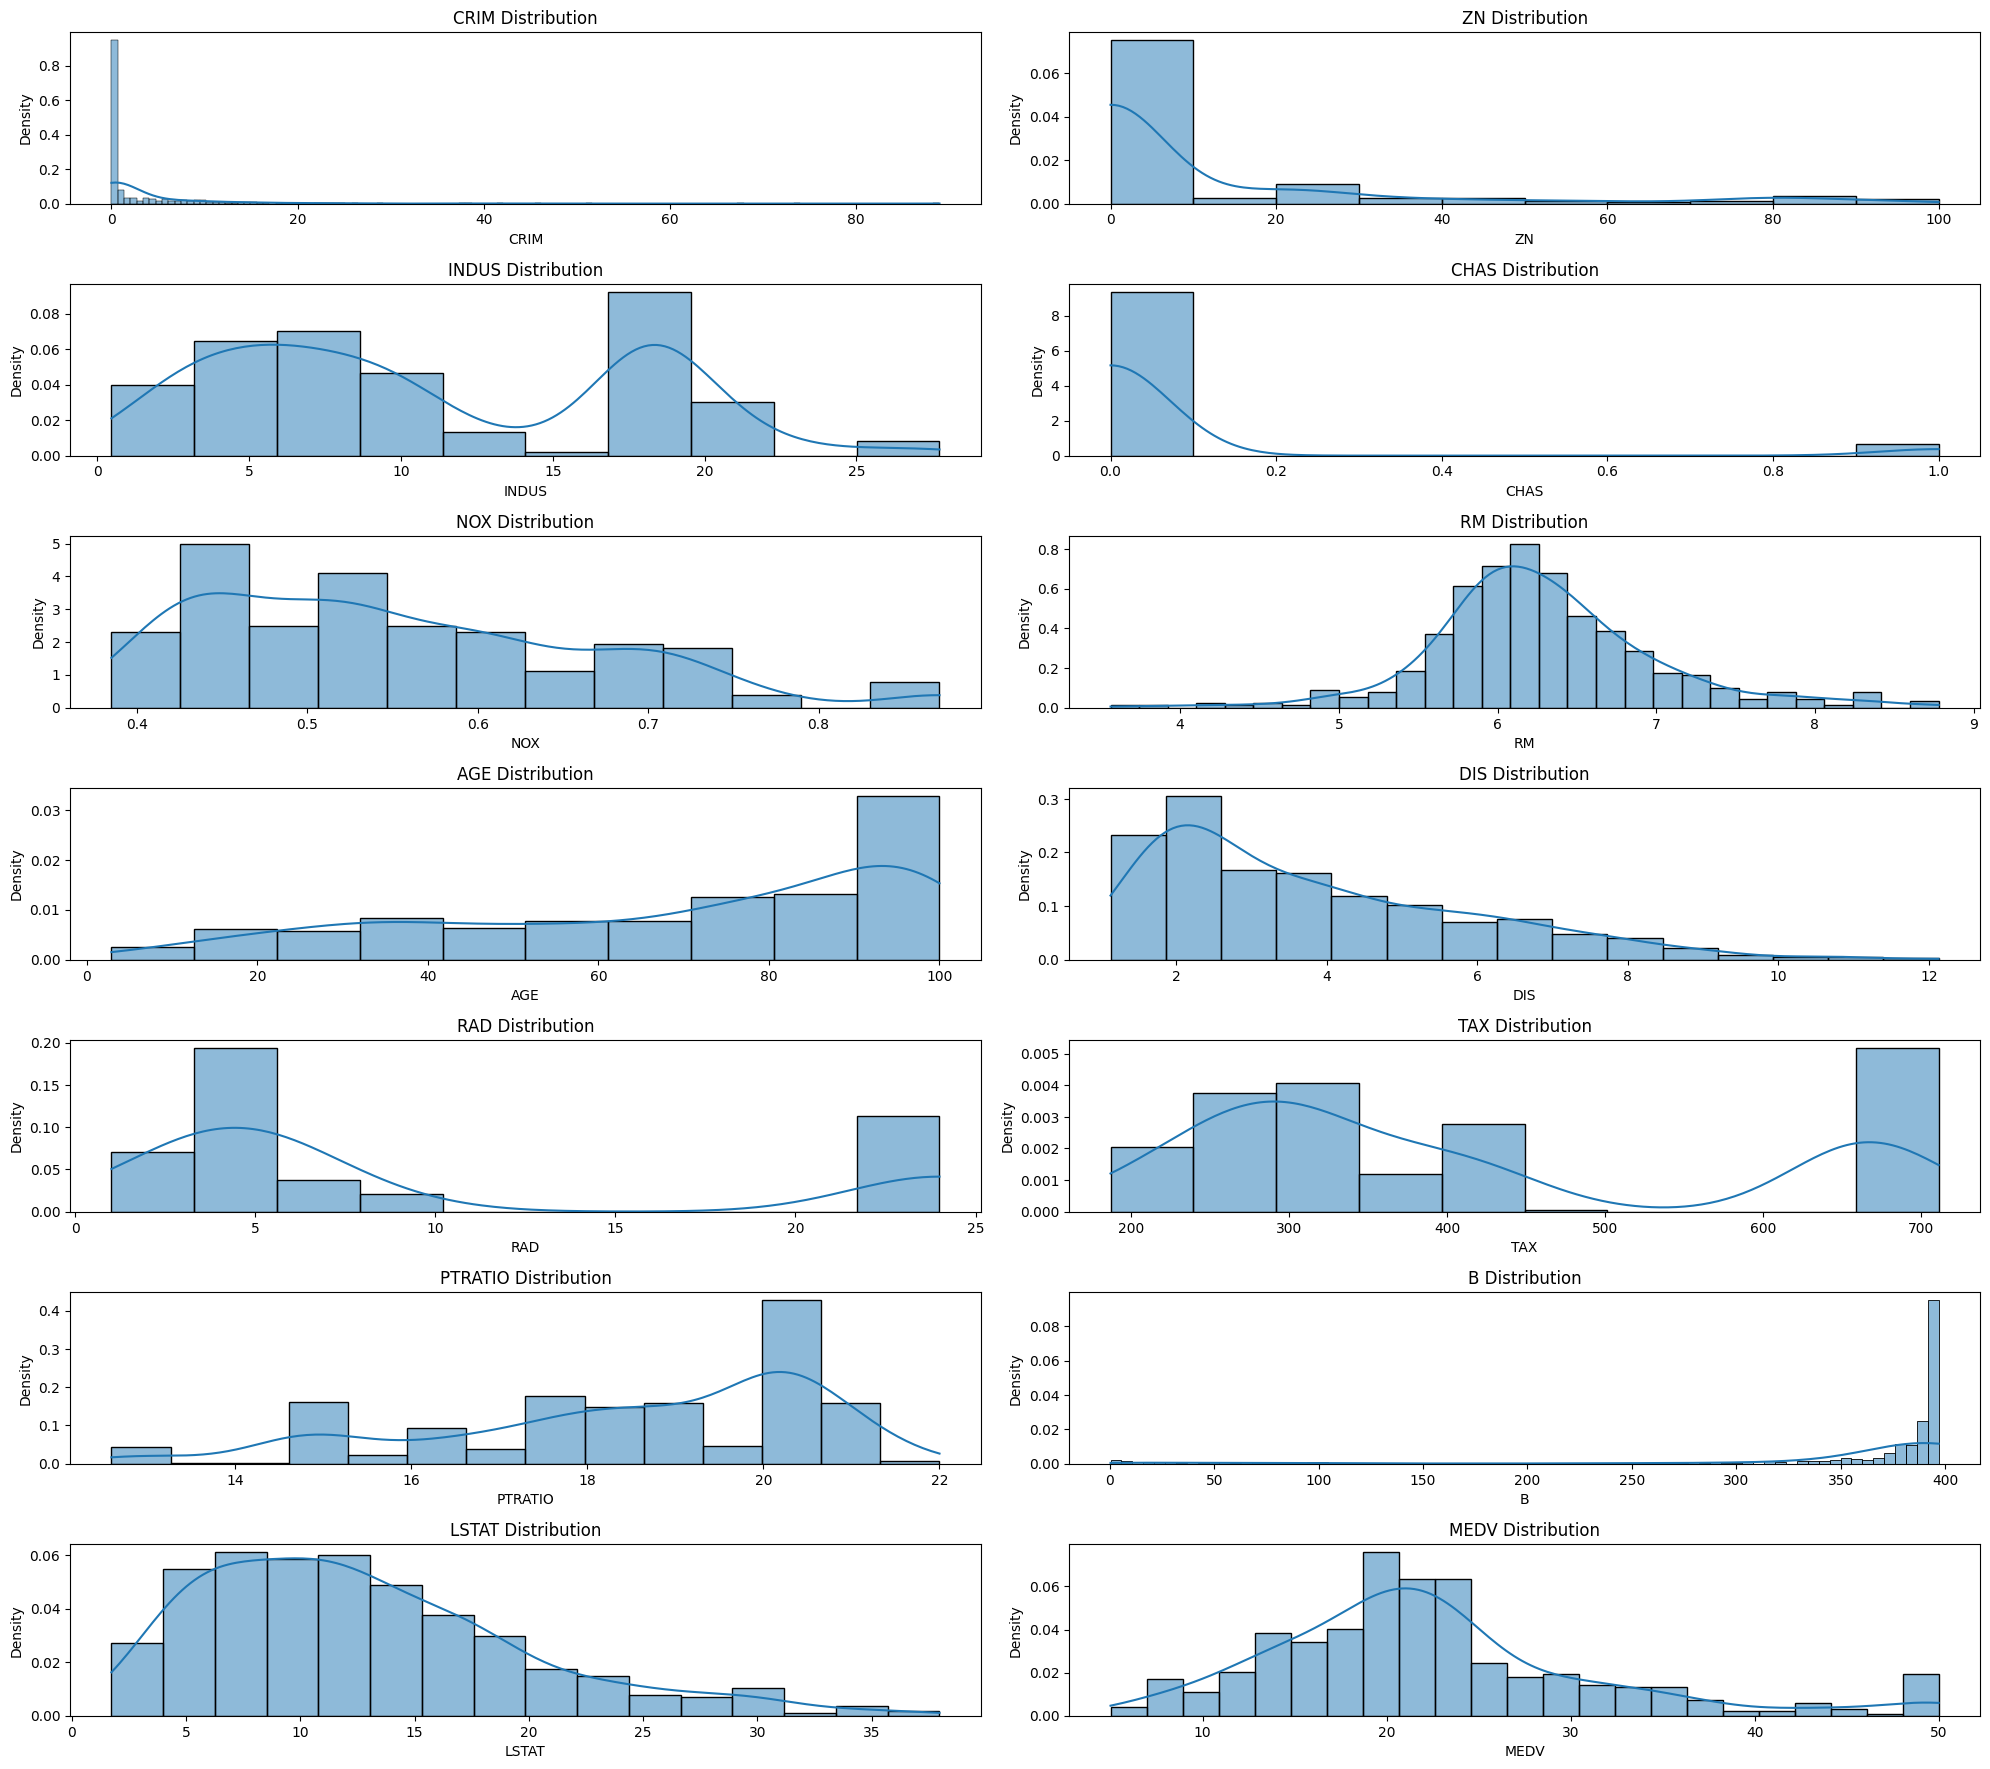

In [10]:
x=1
plt.figure(figsize=(20,35))
for i in df.columns:
    plt.subplot(14,2,x)
    sns.histplot(df[i],kde=True,stat='density')
    plt.title(F"{i} Distribution")
    x+=1
plt.tight_layout()
plt.show()

### Applying Lognormal transformation on highly skewed features

In [11]:
df['CRIM'] = np.log1p(df['CRIM'])
df['ZN'] = np.log1p(df['ZN'])
df['B'] = np.log1p(df['B'])
df['LSTAT'] = np.log1p(df['LSTAT'])
df['RM'] = np.log1p(df['RM'])

MEDV       1.000000
RM         0.666174
ZN         0.385122
B          0.290198
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
NOX       -0.427321
CRIM      -0.462388
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.793882
Name: MEDV, dtype: float64


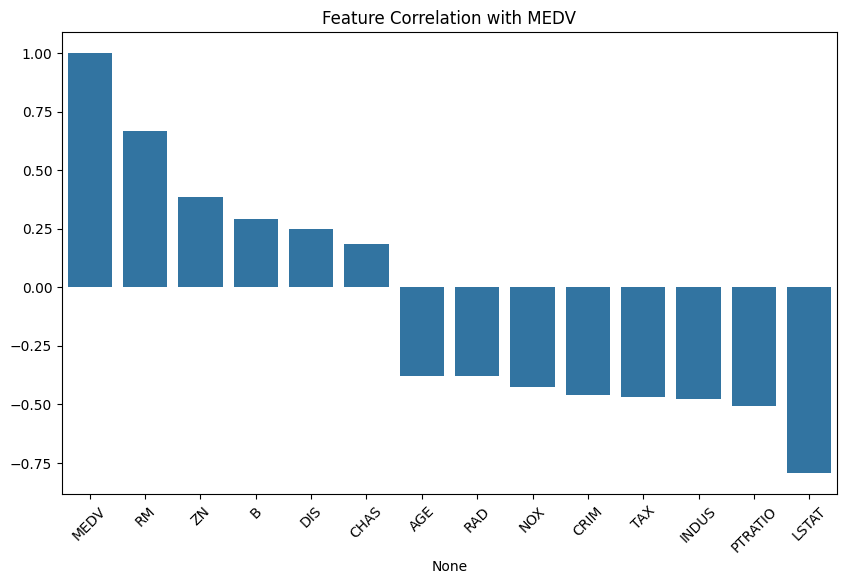

In [12]:
correlation = df.corr()['MEDV'].sort_values(ascending=False)
print(correlation)

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=45)
plt.title("Feature Correlation with MEDV")
plt.show()

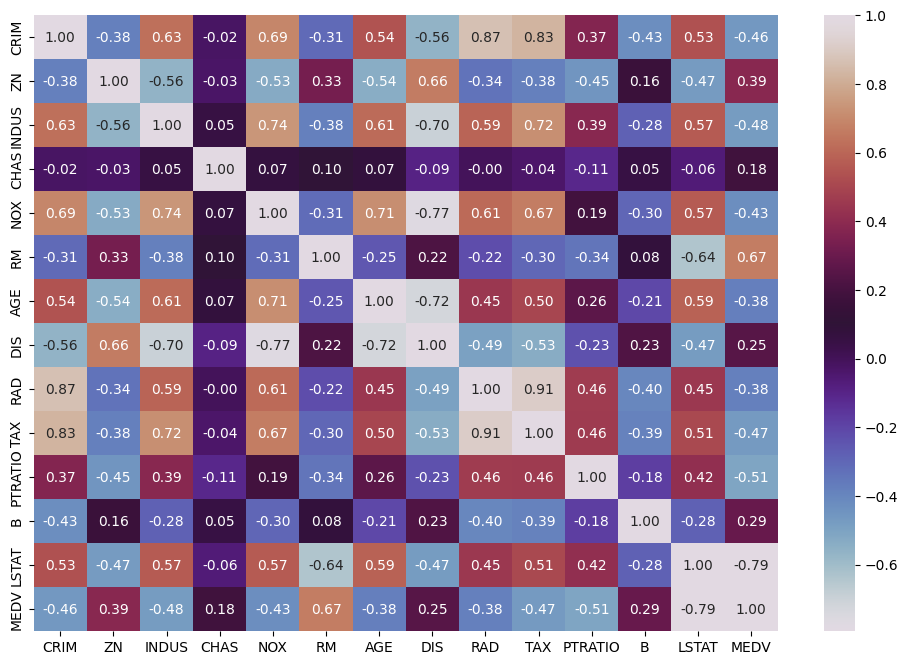

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='twilight', fmt='.2f')
plt.show()

### Selecting our feature for model training

In [14]:
X = df['LSTAT']
y=df['MEDV']

In [15]:
X.head()

0    1.788421
1    2.316488
2    1.615420
3    1.371181
4    2.520113
Name: LSTAT, dtype: float64

In [16]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [17]:
print(f"X={X.shape} Y={y.shape}")

X=(506,) Y=(506,)


In [18]:
import math
# Size of train split
math.floor(0.2*506)

101

In [19]:
# Size of test split
math.ceil(0.8*506)

405

### Reshaping and defining the Trainining and Testing Sets

In [20]:
train_input = np.array(df.LSTAT[:405]).reshape(405, 1)
train_output = np.array(df.MEDV[:405]).reshape(405, 1)

test_input = np.array(df.LSTAT[405:]).reshape(101,1)
test_output = np.array(df.MEDV[405:]).reshape(101,1)

## Linear Regression
### Forward Propagation

In [21]:
def forward_pass(train_input : np.array, parameters:dict)->np.array:
    m = parameters['m']     # Slope of line
    c = parameters['c']     # Y intercept

    prediction = np.multiply(m, train_input) + c        # mx + c for all the values of series 
    return prediction

### Cost function

In [22]:
def cost_function(predictions : np.array, train_output : np.array) -> float:
    cost = np.mean((train_output-predictions)**2)*0.5
    return cost

### Gradient Descent function for backpropagation
df = f(x)-y

In [23]:
def backward_propagation(train_input:np.array, train_output:np.array, predictions:np.array) -> dict:
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives = dict()
    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

### Update parameters
- m = m - (learning_rate * dm)
- c = c - (learning_rate * dc)

In [24]:
def update_parameters(parameters:dict, derivatives:dict, learning_rate:float)->dict:
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters 


### Model Training

In [25]:
def train(train_input:np.array, train_output:np.array, learning_rate:float, epochs:int)->tuple:
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    loss = []
    alpha = 0.0005

    for i in range(epochs):
        predictions = forward_pass(train_input, parameters)
        cost = cost_function(predictions, train_output)
        loss.append(cost)
        if i % 100 == 0:
            print(f'Iteration {i}\nLoss : {cost}')
            fig, ax = plt.subplots()
            ax.plot(train_input, train_output, '+', label='Original Data')
            ax.plot(train_input, predictions, '*', label='Training')
            plt.show()

        if abs(loss[len(loss)-1] - loss[len(loss)-2]) < alpha and i>2:
            print(f'Early Stopping to prevent overfitting\nIteration{i}\n{loss[len(loss)-1]}-{loss[len(loss)-2]} = {loss[len(loss)-1]-loss[len(loss)-2]}')
            fig, ax = plt.subplots()
            ax.plot(train_input, train_output, '+', label='Original Data')
            ax.plot(train_input, predictions, '*', label='Training')
            plt.show()
            break

        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)

    
    return (parameters, loss)
        

### Training

Iteration 0
Loss : 293.73613205265906


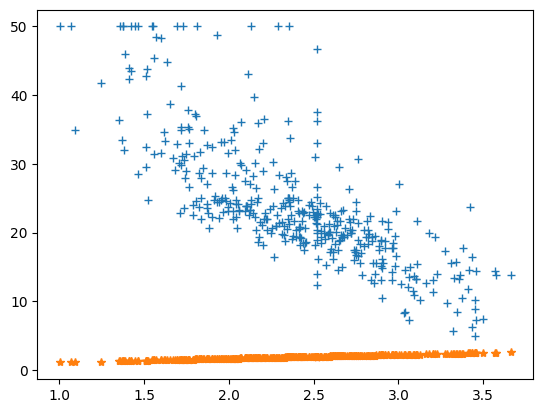

Iteration 100
Loss : 61.332050770650426


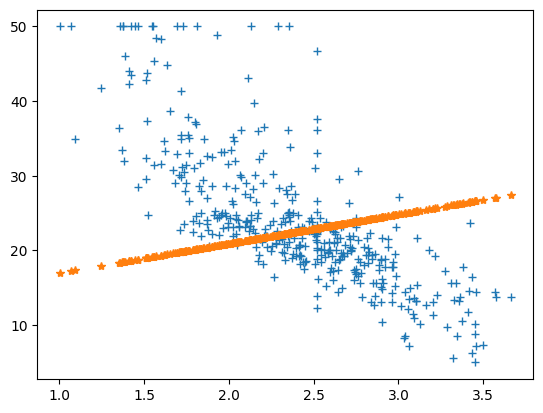

Iteration 200
Loss : 46.9048896217649


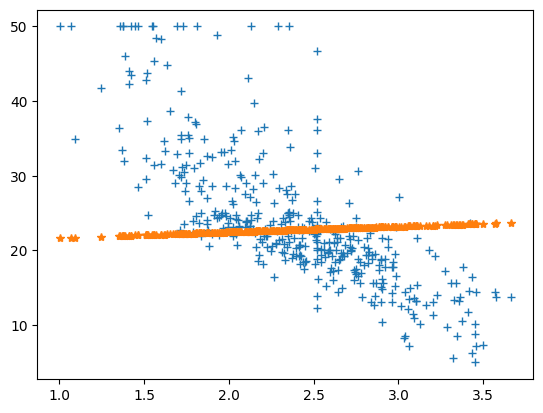

Iteration 300
Loss : 37.198970997386


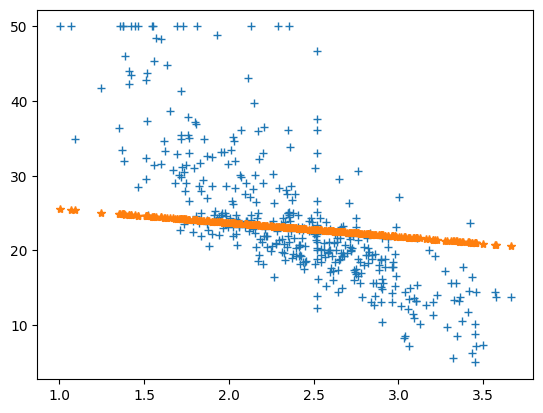

Iteration 400
Loss : 30.669283322112285


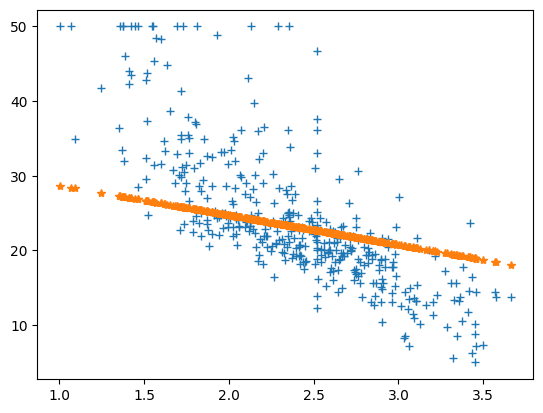

Iteration 500
Loss : 26.27641513655713


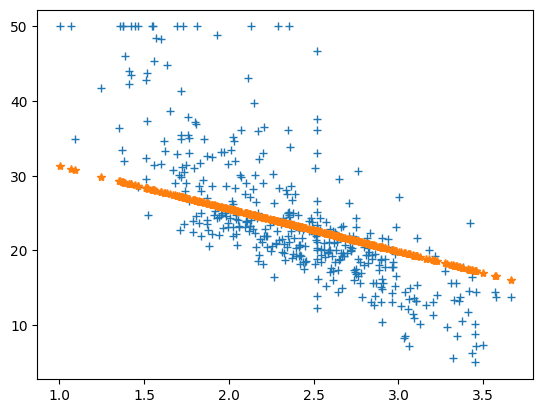

Iteration 600
Loss : 23.321099070103216


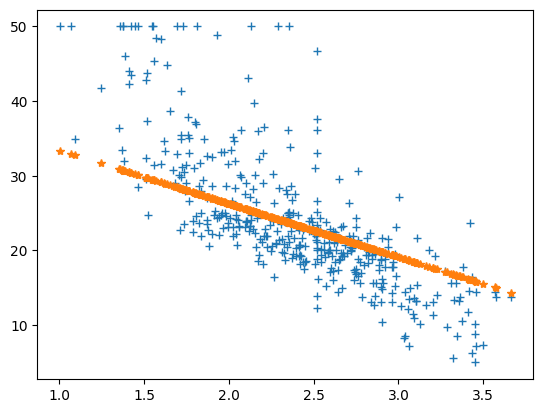

Iteration 700
Loss : 21.332900771469966


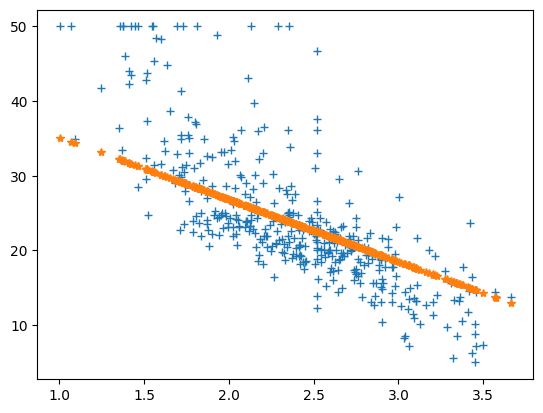

Iteration 800
Loss : 19.995334032142786


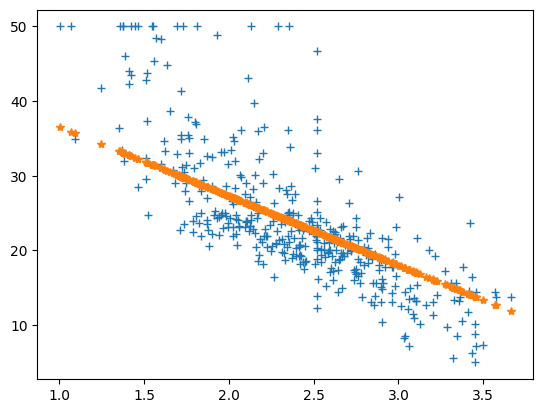

Iteration 900
Loss : 19.09548174709443


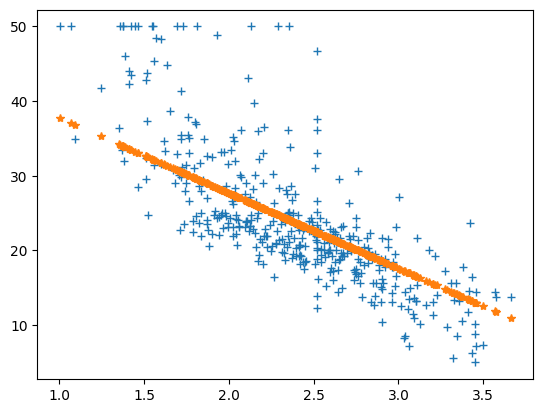

Iteration 1000
Loss : 18.490103255615146


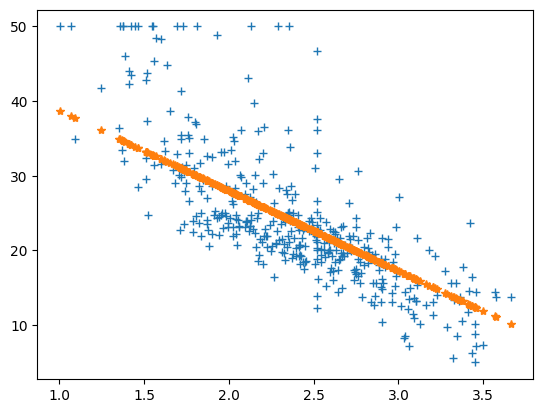

Iteration 1100
Loss : 18.082832946882164


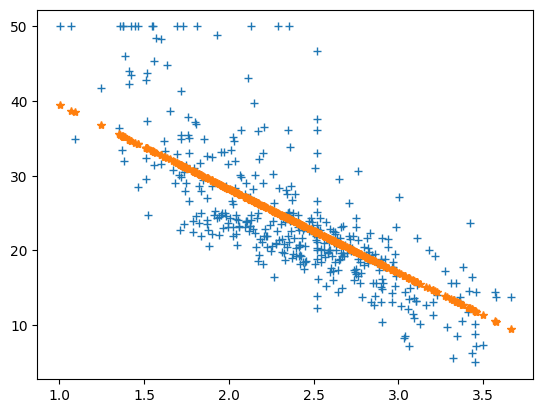

Iteration 1200
Loss : 17.808840549216765


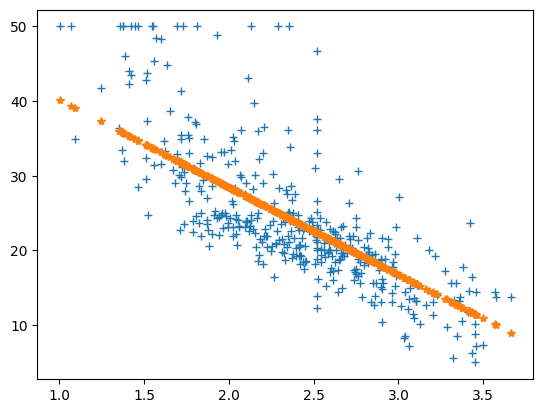

Iteration 1300
Loss : 17.624511290813487


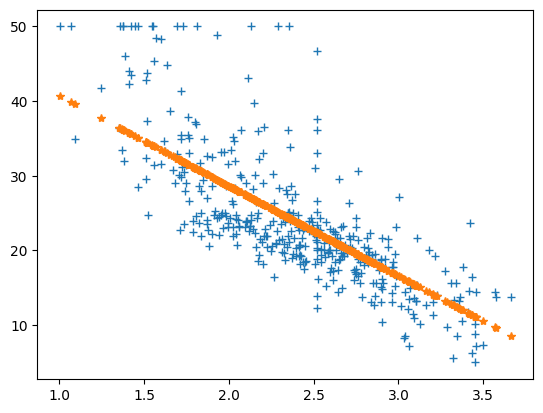

Iteration 1400
Loss : 17.500503194993982


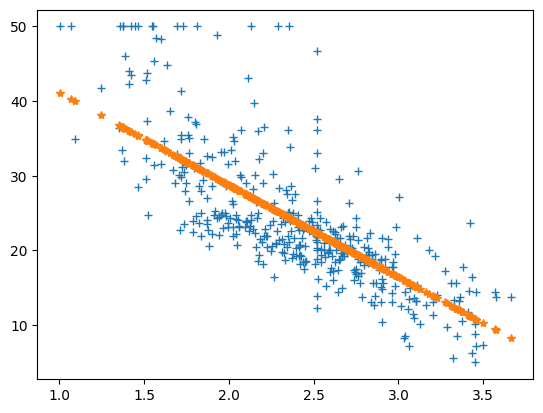

Iteration 1500
Loss : 17.417076353471444


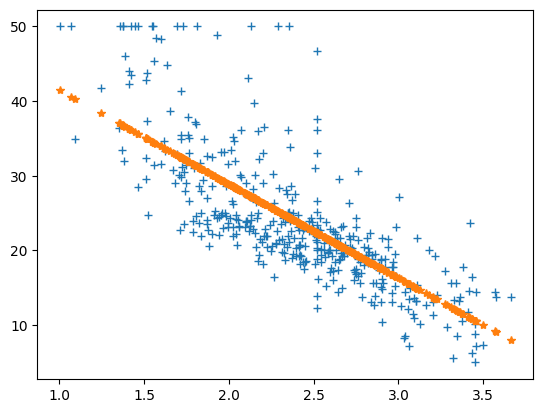

Early Stopping to prevent overfitting
Iteration1579
17.370966116738614-17.371464153468082 = -0.000498036729467799


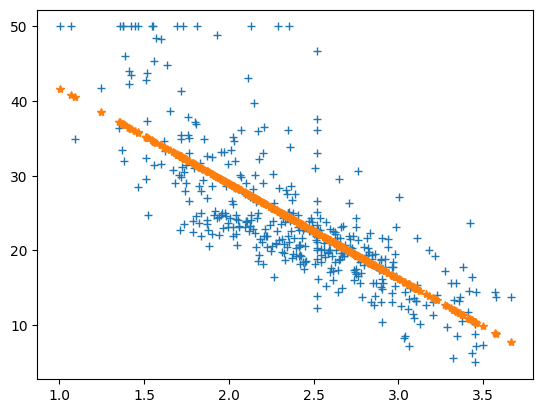

In [26]:
parameters, loss = train(train_input, train_output, 0.05, 5000)

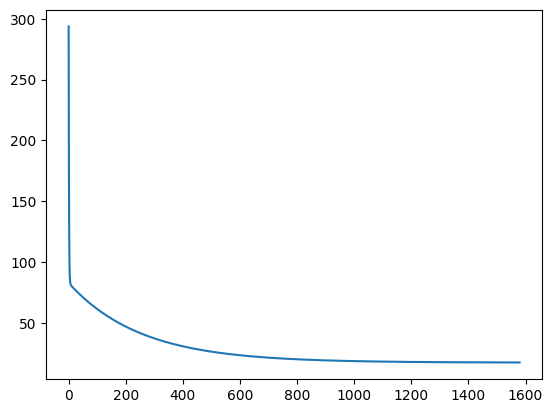

In [27]:
plt.plot(loss)
plt.show()

### Checking the prediction accuracy

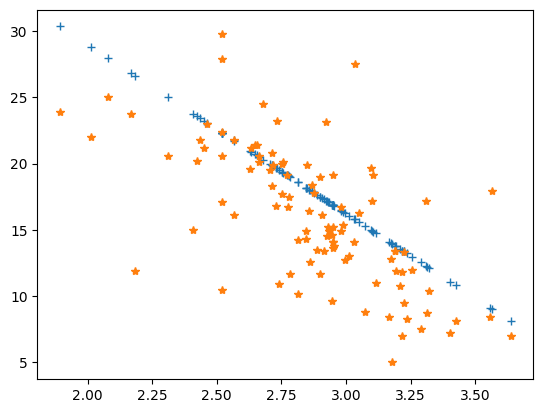

In [28]:
test_predictions = test_input * parameters['m'] + parameters['c']

plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '*')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(train_input, train_output)

LinearRegression()

In [30]:
test_prediction = lr_model.predict(test_input)

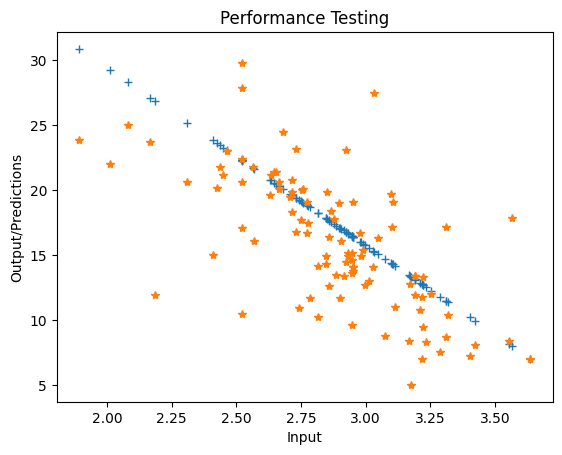

In [33]:
plt.plot(test_input, test_prediction, '+')
plt.plot(test_input, test_output, '*')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output/Predictions')
plt.show()